# Introduction

This notebook describes how to hybridize analytical and numerical waveforms given SXS waveform number using sxs pacakage.

This procedure can be divided into following steps

1. Load and store NR waveforms
2. Generate and store PN waveforms
5. Find Euler angles for rigid rotation
3. Perform optimization for time translation, and phase shift
4. Perform Rigid rotation, time translation, and phase shift


Let us fisrt import the required pacakegs and libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Automate_utils import *
from get_sxs import *
import argparse

[Loading lalsimutils.py : MonteCarloMarginalization version]
  scipy :  1.9.1
  numpy :  1.23.4


uncomment and edit the line below to give waveform number

In [2]:
waveformnumber = "0123"
#waveformnumber = "1392"

define constants and set time for rigid roataion and hybrid interval.

In [3]:
T_for_RigRot, T_Hybrid_Interval_Start, T_Hybrid_Interval_End = -0.7, -0.7, -0.3

#DISTANCE=300*megaparsec

#MASS = 70 * msun

# 1. NR Waveform 

We use sxs pacakge to get NR waveform modes 

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0123v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0123v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
factor=  0.00034478437178805027


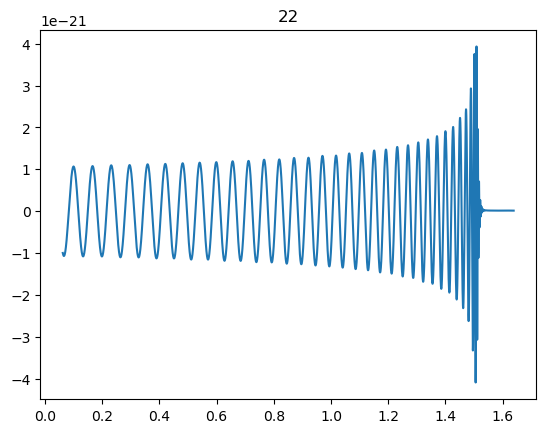

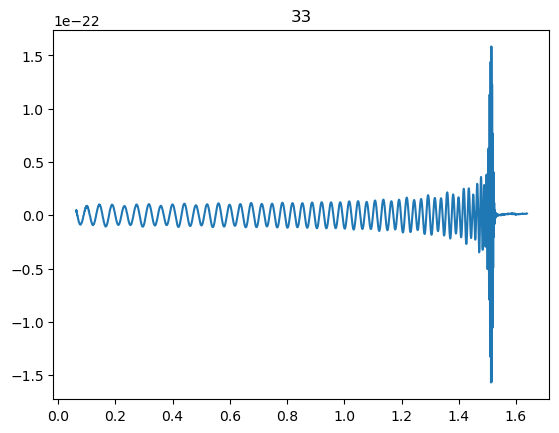

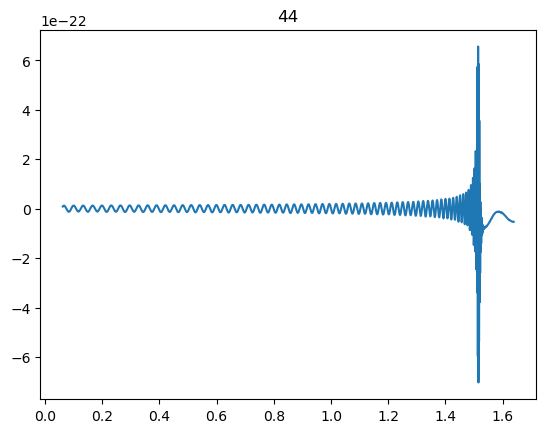

0

In [4]:
get_modes_from_sxs(waveformnumber, MASS=70, DISTANCE=300*megaparsec)

# 2. PN Waveform

To get PN waveform, let us first get parameters(mass, spins, and frequncy) using sxs pacakage.  

In [5]:
metadata = sxs.load("SXS:BBH:"+waveformnumber+"/Lev/metadata.json")
qratio = metadata["reference_mass_ratio"]
Mtotal = 70
spin1 = metadata["reference_dimensionless_spin1"]
spin2 = metadata["reference_dimensionless_spin2"]
forb = metadata["reference_orbital_frequency"]


Found the following files to load from the SXS catalog:
    SXS:BBH:0123v5/Lev5/metadata.json


now we need to convert orbital frequency into ordinary frequency in hertz

In [7]:
fmag = np.sqrt(forb[0]**2+forb[1]**2+forb[2]**2) 
frefHz = get_fref(fmag,70)
fmin = frefHz

let us now generate PN waveform modes

P.approx =  19
2 2 4.460675984066392e-21


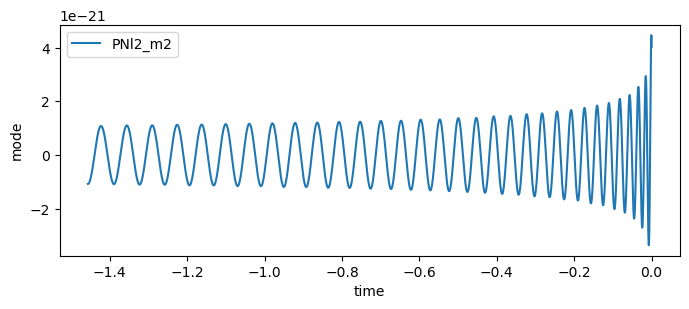

3 3 3.816382901051947e-23


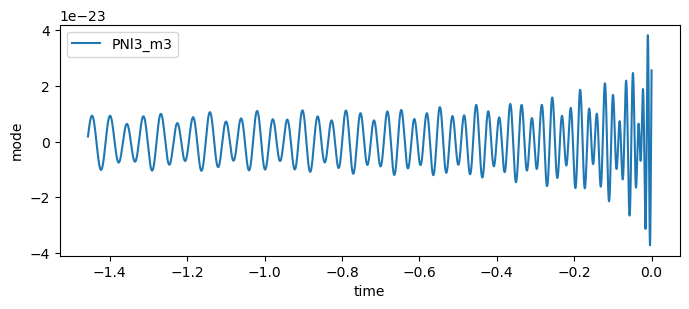

4 4 1.5167210460101975e-22


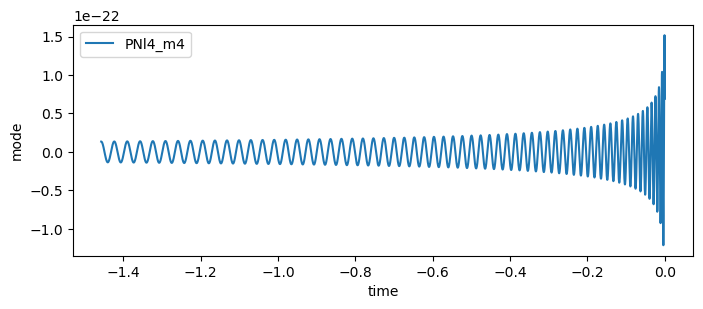

0

In [8]:
hlm_modes_given_param(qratio, Mtotal, spin1[0], spin1[1], spin1[2], spin2[0], 
                      spin2[1], spin2[2], frefHz, fmin, approximant='SpinTaylorT4', 
                      lmax=4, dist=300, model_name='PN')

In [10]:
T_NR, hlm_NR, T_MD, hlm_MD = get_hlm_NR_MD_from_data('SXS','PN')


# 3. Euler Angles

Now we compute euler angles for rigid rotation

In [11]:
Angles_NR, Angles_MD = get_Angels_NR_MD(hlm_NR, hlm_MD)



# 4. Optimization over time translation and phase shift

We can choose the number of inital guesses for time translation and phase shift for which we want to do our optimization.    

In [12]:
nchoose = 10
t0, phi0, psi0 = get_best_OptimizedResults(T_NR, T_MD , hlm_NR, hlm_MD, Angles_NR,Angles_MD,T_for_RigRot,nchoose)



array of optimized func vals = [0.22072099 0.38368312 0.29576671 0.22013483 0.22072099 0.22072099
 0.22072099 0.38368806 0.29576873 0.22013567]
0.22013483121031155 -0.005896111583530284 -0.4820246647816334 1.5708115867396377


# 5. Rigid rotation, time translation, and phase shift

Now we perform rigid 

issue = 26122 25826 25826
issue = 26122 25826 25826
issue = 26122 25826 25826
issue = 26122 25826 25826
issue = 26122 25826 25826


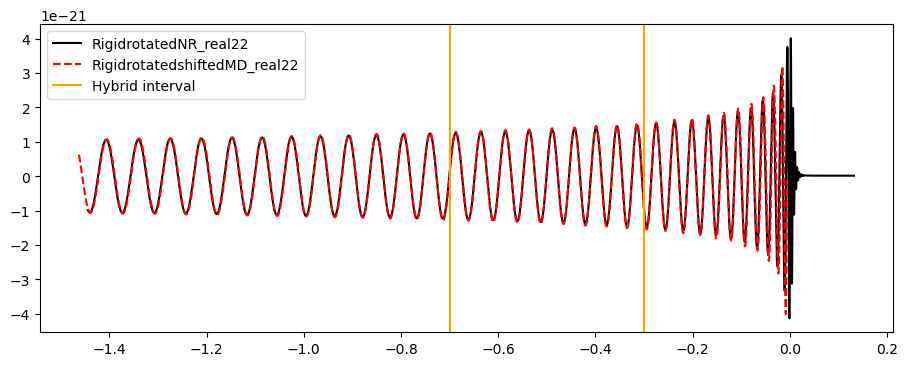

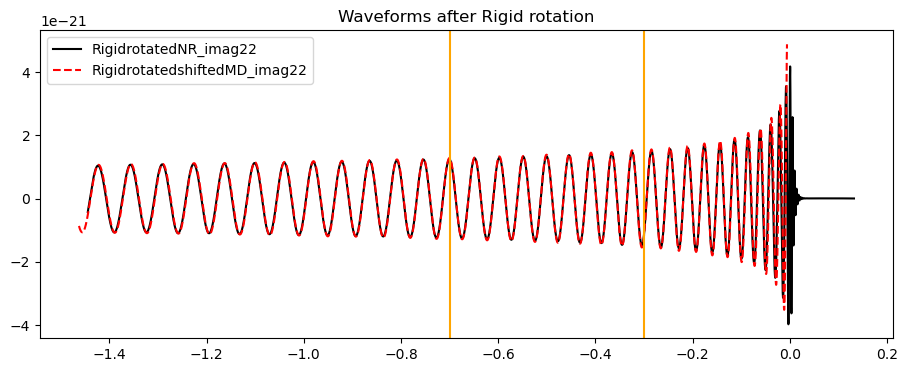

issue = 26122 25826 25826
issue = 26122 25826 25826
issue = 26122 25826 25826
issue = 26122 25826 25826
issue = 26122 25826 25826
issue = 26122 25826 25826
issue = 26122 25826 25826


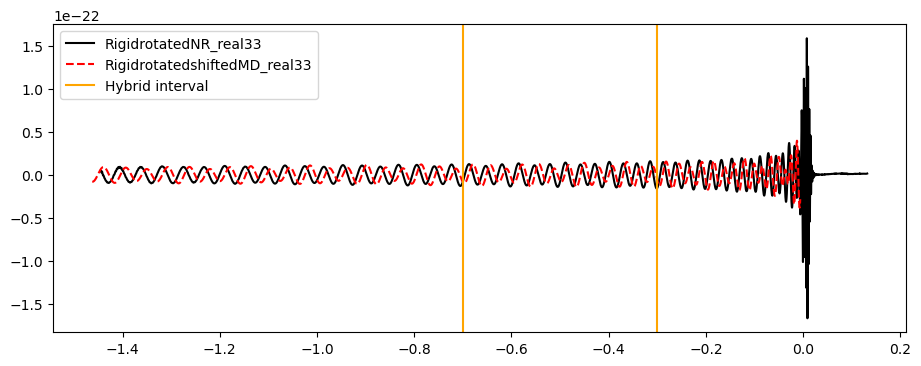

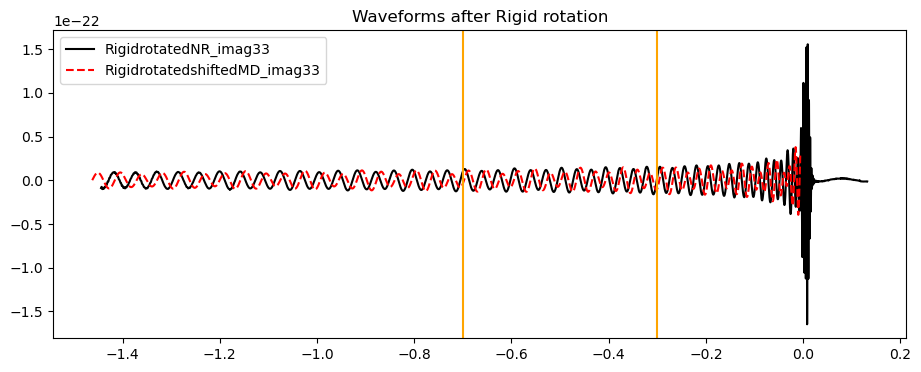

issue = 26122 25826 25826
issue = 26122 25826 25826
issue = 26122 25826 25826
issue = 26122 25826 25826
issue = 26122 25826 25826
issue = 26122 25826 25826
issue = 26122 25826 25826
issue = 26122 25826 25826
issue = 26122 25826 25826


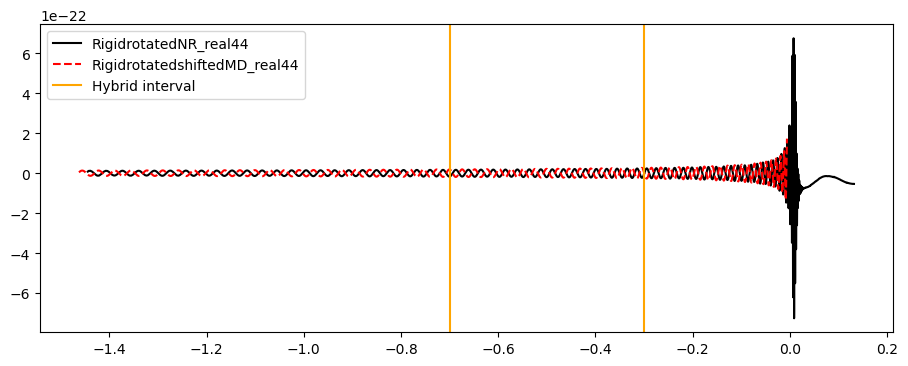

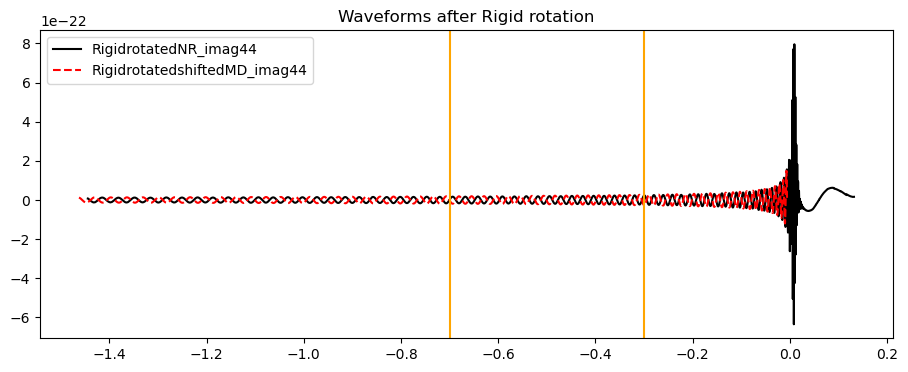

In [11]:


get_hyb_modes(T_NR, hlm_NR, T_MD, hlm_MD, Angles_NR, Angles_MD, t0, phi0, psi0, T_for_RigRot)